# Optional Lab: 逻辑回归的梯度下降算法

## 目标
在这个实验中，您将会：
- 更新逻辑回归的梯度下降算法。
- 在一个熟悉的数据集上探索梯度下降算法。

In [15]:
import copy, math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./deeplearning.mplstyle')

## 数据集
让我们从决策边界实验中使用的相同的双特征数据集开始。

In [16]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

与以前一样，我们将使用一个帮助函数来绘制这个数据。标签为$y=1$的数据点显示为红色叉号，而标签为$y=0$的数据点显示为蓝色圆圈。

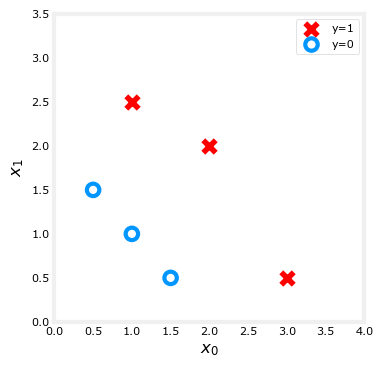

In [17]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## 逻辑回归梯度下降算法
<img align="right" src="./images/C1_W3_Logistic_gradient_descent.png"     style=" width:400px; padding: 10px; " >

回顾梯度下降算法利用梯度计算：
$$\begin{align*}
&\text{重复直到收敛：} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

其中每次迭代同时对所有$j$的$w_j$进行更新，其中：
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

* $m$是数据集中的训练样本数      
* $f_{\mathbf{w},b}(x^{(i)})$是模型的预测值，而$y^{(i)}$是目标值  
* 对于逻辑回归模型   
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    


### 梯度下降实现
梯度下降算法实现有两个组件：
- 实现上述方程（1）的循环。这是下面的 gradient_descent，通常在可选和实验室中提供给您。
- 计算当前梯度，上述方程（2，3）。这是下面的 compute_gradient_logistic。您将被要求在本周的实验室中实现它。

#### 计算梯度，代码描述
为所有$w_j$和$b$实现上述方程（2），（3）。
有许多实现此操作的方法。下面概述了一种方法：
- 初始化变量以累积 `dj_dw` 和 `dj_db`
- 对于每个示例
    - 计算该示例的误差 $g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) - \mathbf{y}^{(i)}$
    - 对于该示例中的每个输入值 $x_{j}^{(i)}$，
        - 将误差乘以该输入 $x_{j}^{(i)}$，并添加到 `dj_dw` 的相应元素中。（上述方程2）
    - 将误差添加到 `dj_db` 中（上述方程3）

- 将 `dj_db` 和 `dj_dw` 除以示例的总数（m）
- 请注意，numpy中的 $\mathbf{x}^{(i)}$ 可以表示为 `X[i,:]` 或 `X[i]`，而 $x_{j}^{(i)}$ 可以表示为 `X[i,j]`

In [14]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  


请使用下面的单元格检查梯度函数的实现。

In [18]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


**Expected output**
``` 
dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
```

#### 梯度下降代码
下面实现了上述方程（1）。请花一点时间查找并比较例程中的函数和上面的方程。

In [12]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


Let's run gradient descent on our data set.

In [13]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28 5.08], b:-14.222409982019837


#### 让我们绘制梯度下降的结果：

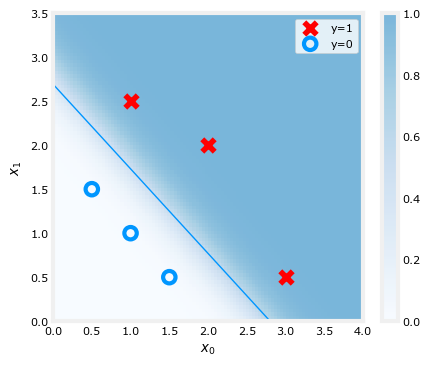

In [19]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[1]
x1 = -b_out/w_out[0]
ax.plot([0,x0],[x1,0], c=dlc["dlblue"], lw=1)
plt.show()

上面的图中：
 - 阴影反映了y=1的概率（决策边界之前的结果）
 - 决策边界是使概率=0.5的线。
 

## 另一个数据集
让我们回到一个单变量的数据集。只用两个参数$w$和$b$，就可以使用等高线图绘制代价函数，以更好地了解梯度下降正在进行的内容。

In [9]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])


与之前一样，我们将使用一个辅助函数来绘制这个数据集。标签为$y=1$的数据点显示为红色十字，而标签为$y=0$的数据点显示为黑色圆圈。

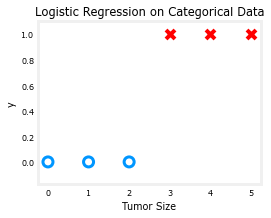

In [10]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
plt_tumor_data(x_train, y_train, ax)
plt.show()

在下面的图中，尝试：
- 在右上方的等高线图中单击以更改$w$和$b$。
    - 更改可能需要一两秒钟
    - 注意左上角绘图中成本的变化值。
    - 注意成本是通过每个示例的损失累积的（垂直虚线）
- 单击橙色按钮运行梯度下降。
    - 注意成本的稳步下降（等高线和成本图以log（cost）为单位）
    - 在等高线图中单击将重置模型以进行新的运行
- 要重置图，请重新运行单元格

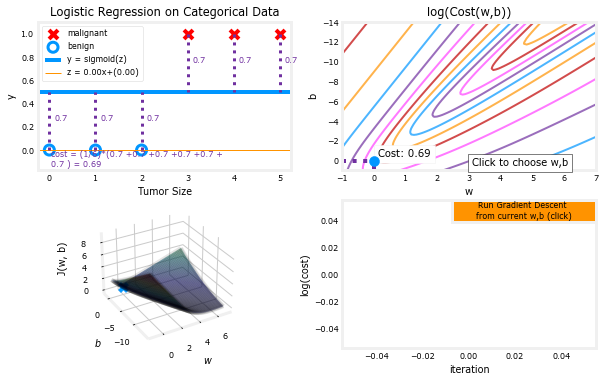

In [11]:
w_range = np.array([-1, 7])
b_range = np.array([1, -14])
quad = plt_quad_logistic( x_train, y_train, w_range, b_range )

## Congratulations!
You have:
- examined the formulas and implementation of calculating the gradient for logistic regression
- utilized those routines in
    - exploring a single variable data set
    - exploring a two-variable data set